In [1]:
import cv2 as cv
from pathlib import Path
from tqdm import tqdm
import matplotlib.pyplot as plt
import sys

from ipywidgets import interactive, widgets, Layout

%matplotlib inline 

In [2]:
# After we publish the stable version on Pypi, you can use 
# import pv-vision

#sys.path.append("../../pv-vision")
from pv_vision.transform_crop.solarmodule import MaskModule

In this tutorial, we will learn how to use pv-vision to 
crop a module image into single cells using our 'contour-detection' method. 

Note how our tool is robust to the mounting rack in the background


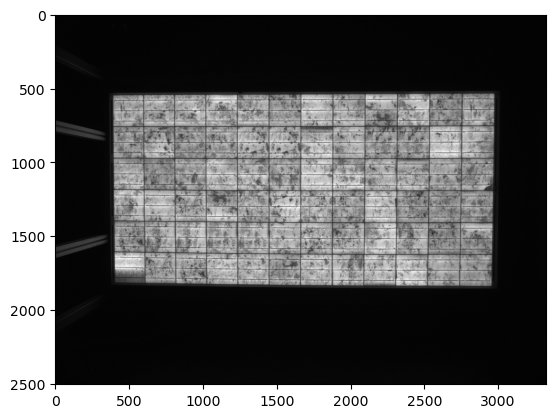

In [3]:
img = cv.imread('../examples/transform_seg/module_imgs/example_3.jpg', 0)
raw_module = MaskModule(img, 6, 12, 3) # 6 rows && 10 columns && 3 busbar
plt.imshow(raw_module.image, 'gray')

In [4]:
## Load mask.
## Note that this is different from the transform_cnn 
## method where the mask is predicted by a cnn model.
## In this image, the background is not very complex, so
## we can use simpler computer vision method.

## we can use the slider to find the optimal threshold value

def update_mask(thre):
    mask = raw_module.load_mask(thre=thre, output=True)
    plt.figure(figsize=(8, 6))
    plt.imshow(mask, "gray")

thre = widgets.FloatSlider(value=0.6, min=0, max=1, step=0.05)
interactive(update_mask,
            thre=thre, description="Threshold")

interactive(children=(FloatSlider(value=0.6, description='thre', max=1.0, step=0.05), Output()), _dom_classes=…

In [5]:
## the threshold value could be applied to the same batch of images
thre.value

0.6

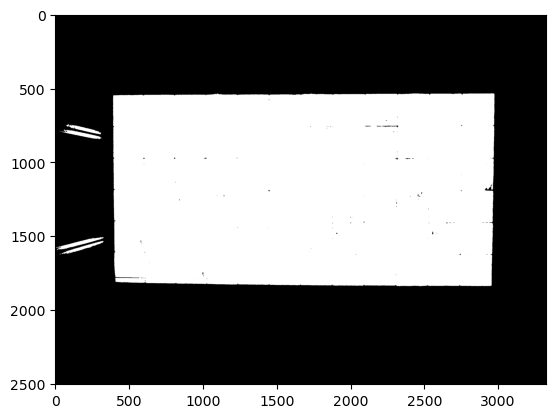

In [6]:
# the mask is stored in raw_module instance

plt.imshow(raw_module.mask, "gray")

In [7]:
# detect corners, different modes are provided

def update_corner(mode):
    corners = raw_module.corner_detection_cont(output=True, mode=mode)
    x, y = zip(*corners)

    plt.figure(figsize=(8, 6))
    plt.imshow(raw_module.mask, 'gray')
    plt.scatter(x, y, c='r')

mode=widgets.IntSlider(value=0, min=0, max=4, step=1)
interactive(update_corner,
            mode=mode)

interactive(children=(IntSlider(value=0, description='mode', max=4), Output()), _dom_classes=('widget-interact…

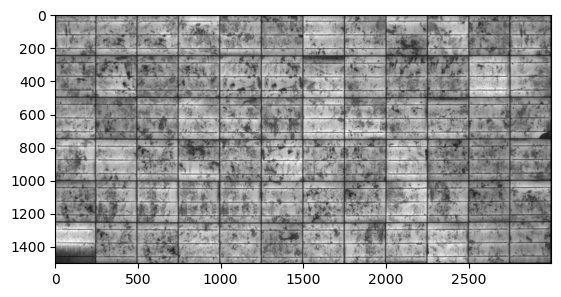

In [8]:
# transform modules
img_transformed = raw_module.transform(cellsize=250, img_only=True)
plt.imshow(img_transformed, 'gray')

In [9]:
# tune the parameters for the vertical edges

def update_edges(vl_split_size, vl_interval, vl_margin, vl_thre):
    fig = plt.figure(figsize=(8, 6))
    raw_module.plot_peaks(n_list=[2, 5, 6], split_size=vl_split_size,
                          interval=vl_interval, margin=vl_margin, thre=vl_thre, direction=0)

inner_edges_para = {
    'vl_interval': widgets.IntText(value=150),
    'vl_thre': widgets.FloatText(value=0.9),
    'vl_split_size': widgets.IntText(value=200),
    'vl_margin': widgets.IntText(value=200)
}

interactive(update_edges, **inner_edges_para)

interactive(children=(IntText(value=200, description='vl_split_size'), IntText(value=150, description='vl_inte…

In [10]:
# tune the parameters for the horizontal edges

def update_edges(hl_split_size, hl_interval, hl_margin, hl_thre):
    fig = plt.figure(figsize=(8, 6))
    raw_module.plot_peaks(n_list=[3, 6, 9], split_size=hl_split_size,
                          interval=hl_interval, margin=hl_margin, thre=hl_thre, direction=1)

inner_edges_para = {
    'hl_interval': widgets.IntText(value=200),
    'hl_thre': widgets.FloatText(value=0.9),
    'hl_split_size': widgets.IntText(value=200),
    'hl_margin': widgets.IntText(value=100)
}

interactive(update_edges, **inner_edges_para)

interactive(children=(IntText(value=200, description='hl_split_size'), IntText(value=200, description='hl_inte…

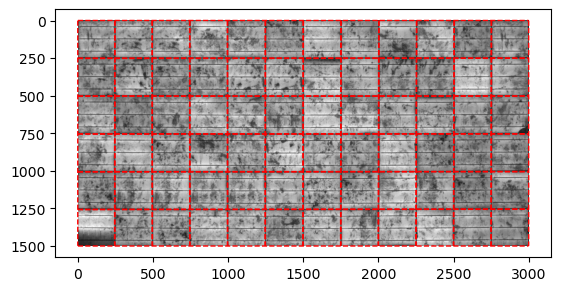

In [11]:
# crop cells
single_cells = raw_module.crop_cell(cellsize=250, plot=True)


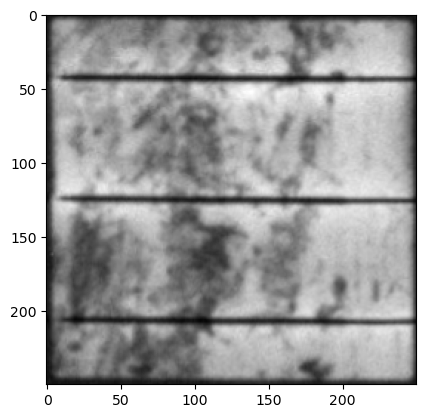

In [12]:
plt.imshow(single_cells[50], 'gray')

# Done!